# Análise de perfil de cliente para renovação de seguros

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importando a base de dados

In [2]:
df = pd.read_excel('data/base-seguros.xlsx', sheet_name='Base')
df.head()

,Flag_Renovou,Idade,Perfil_Risco,Diferenca_Perfil,Genero,Profissao,Tempo_Apolice,Uso_Veiculo,Qte_Apolices,Premio_Final,Premio_Qte_Parc,Premio_Pago_Ult,Premio_Mercado,Premio_Orig,Veic_Idade,Veic_Idade_Compra,Veic_Garagem,Veic_Potencia,Veic_Regiao
0,0,38,stable,only partner,Male,normal,1,private or freelance work,1,232.46,4 per year,232.47,221.56,243.59,9,8,private garage,225 kW,Reg7
1,1,35,stable,same,Male,normal,1,private or freelance work,1,208.53,4 per year,208.54,247.56,208.54,15,7,private garage,100 kW,Reg4
2,1,29,stable,same,Male,normal,0,private or freelance work,1,277.34,1 per year,277.35,293.32,277.35,14,6,underground garage,100 kW,Reg7
3,0,33,down,same,Female,medical,2,private or freelance work,1,239.51,4 per year,244.40,310.91,219.95,17,10,street,75 kW,Reg5
4,0,50,stable,same,Male,normal,8,unknown,1,554.54,4 per year,554.55,365.46,519.50,16,8,street,75 kW,Reg14


## Conhecendo os dados

Dicionário de Dados - Primeiros Insights:

- Flag Renovou: Será nossa variável resposta. Cabe entender se há dados faltantes na base e suas frequências.

Dados do Segurado:
- Idade: Pode ser um fator de risco para a concessão ou não do seguro. Verificar se há dados faltantes.
- Perfil_Risco: Quantos perfis existem?
- Diferenca_Perfil: Perfis de quem dirige o veículo, se o segurado, se inclui familiares, etc.
- Genero: Como é a distribuição? Há dados faltantes?
- Profissao: Pode ser um fator de risco.
- Tempo_Apolice: Ajuda a definir o risco, já que em renovações sem sinistro, há reduções nos valores dos seguros
- Uso_Veiculo: Outro fator de risco, assim como a Profissão. O uso é pessoal ou profissional? Algum outro uso?

Dados dos Seguros:
- Qte_Apolices: Tem alguma relação, dependendo do tipo de cliente?
- Premio_Final: Valor que o cliente pagou na renovação do seguro. Algum impacto na variável resposta?
- Premio_Qte_parc: número de parcelas do seguro. Há variações?
- Premio_Pago_Ult: Quanto o cliente pagou na última renovação.
- Premio_Mercado: estimativa de quanto a concorrência está cobrando no mesmo seguro.
- Premio_Orig: O setor de pricing do banco calculou esse valor pela renovação. Foi muito diferente do valor efetivamente pago?

Dados do Item Segurado:
- Veic_Idade: a idade dos veículos são muito variadas? Há dados faltantes?
- Veic_Idade_Compra: o veículo era novo ou usado na data da compra?
- Veic_Garagem: são muitas variáveis? Há dados faltantes?
- Veic_Potencia: a potência do veículo impacta no risco para cálculo do seguro?
- Veic_Regiao: há diferenças de criminalidade ou outro fator? Há dados faltantes?

In [ ]:
# Dados faltantes
df.isnull().sum()

Flag_Renovou         0
Idade                0
Perfil_Risco         0
Diferenca_Perfil     0
Genero               0
Profissao            0
Tempo_Apolice        0
Uso_Veiculo          0
Qte_Apolices         0
Premio_Final         0
Premio_Qte_Parc      0
Premio_Pago_Ult      0
Premio_Mercado       0
Premio_Orig          0
Veic_Idade           0
Veic_Idade_Compra    0
Veic_Garagem         0
Veic_Potencia        0
Veic_Regiao          0
dtype: int64

In [12]:
df.isna().sum() / df.shape[0] * 100

Flag_Renovou         0.0
Idade                0.0
Perfil_Risco         0.0
Diferenca_Perfil     0.0
Genero               0.0
Profissao            0.0
Tempo_Apolice        0.0
Uso_Veiculo          0.0
Qte_Apolices         0.0
Premio_Final         0.0
Premio_Qte_Parc      0.0
Premio_Pago_Ult      0.0
Premio_Mercado       0.0
Premio_Orig          0.0
Veic_Idade           0.0
Veic_Idade_Compra    0.0
Veic_Garagem         0.0
Veic_Potencia        0.0
Veic_Regiao          0.0
dtype: float64

Não há dados faltantes nas linhas, o que pode reduzir nosso trabalho de tratamento.

## Análise Univariada das Variáveis

## Funções para reutilização

In [3]:
def plot_resumos(df, coluna):
    """
    Gera 4 gráficos para análise de uma coluna numérica:
    1. Histograma
    2. Boxplot horizontal
    3. Boxplot horizontal com pontos sobrepostos
    4. Violin plot horizontal
    """
    sns.set(style='whitegrid')

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Visualizações para a coluna: {coluna}', fontsize=16)

    # Histograma
    sns.histplot(data=df, x=coluna, kde=True, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histograma')

    # Boxplot horizontal
    sns.boxplot(data=df, x=coluna, ax=axes[0, 1], color='lightgreen')
    axes[0, 1].set_title('Boxplot')

    # Boxplot + dados sobrepostos
    sns.boxplot(data=df, x=coluna, ax=axes[1, 0], color='lightgray', width=0.4)
    sns.stripplot(data=df, x=coluna, ax=axes[1, 0], 
                  color='black', size=4, jitter=0.15, alpha=0.7)
    axes[1, 0].set_title('Boxplot com Pontos Sobrepostos')

    # Violin plot horizontal
    sns.violinplot(data=df, x=coluna, ax=axes[1, 1], 
                   color='lightcoral', inner='box')
    axes[1, 1].set_title('Gráfico de Violino')

    # Layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [4]:
def tab_freq(df, col):
    tab_freq = df[col].value_counts().reset_index()
    tab_freq.columns = [col, 'Frequência_Absoluta']

    # Freq. Relativa
    tab_freq['Frequência_Relativa'] = (100 * (tab_freq['Frequência_Absoluta'] / tab_freq['Frequência_Absoluta'].sum())).round(2)
    
    # Contagem Acumulada
    tab_freq['Frequência_Acumulada'] = tab_freq['Frequência_Absoluta'].cumsum()

    # Percentual Acumulado
    tab_freq['% Acumulado'] = tab_freq['Frequência_Relativa'].cumsum().round(2)

    return tab_freq

In [5]:
def plot_barras(df, coluna):
    """
    Gera um gráfico de barras ordenado do maior para o menor.
    """
    sns.set(style='whitegrid')
    plt.figure(figsize=(8, 6))

    # Conta os valores e ordena do maior pro menor
    ordem = df[coluna].value_counts().index

    # Gráfico de barras com ordenação e sem warnings
    sns.countplot(data=df, x=coluna, hue=coluna,
                  order=ordem, palette='pastel', legend=False)

    # Título e rótulos
    plt.title(f'Gráfico de Barras - {coluna}', fontsize=14)
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Idade

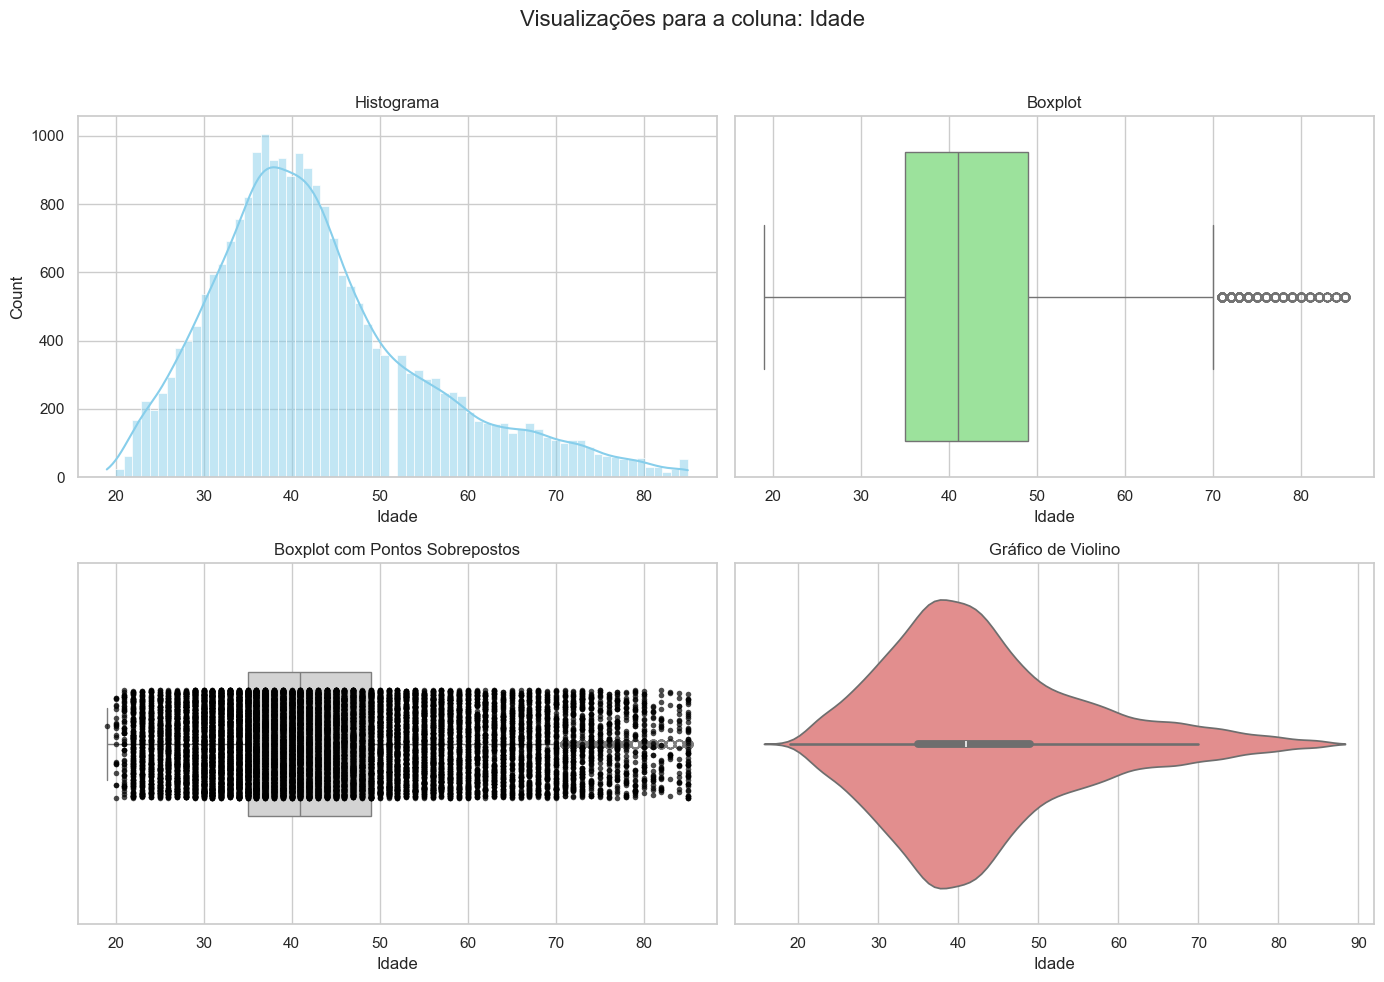

In [20]:
plot_resumos(df, 'Idade')

Temos uma distribuição mais à direita, com uma média em torno de 35 a 40 anos. Mas temos clientes, ainda que em pouca quantidade, até acima de 80 anos. 50% dos clientes está na faixa etária de 35 a 50 anos, conforme exibido pelo boxplot.

### Perfil de Risco

In [23]:
tab_freq(df, 'Perfil_Risco')

,Perfil_Risco,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,stable,12036,52.19,12036,52.19
1,down,10155,44.04,22191,96.23
2,up,869,3.77,23060,100.00


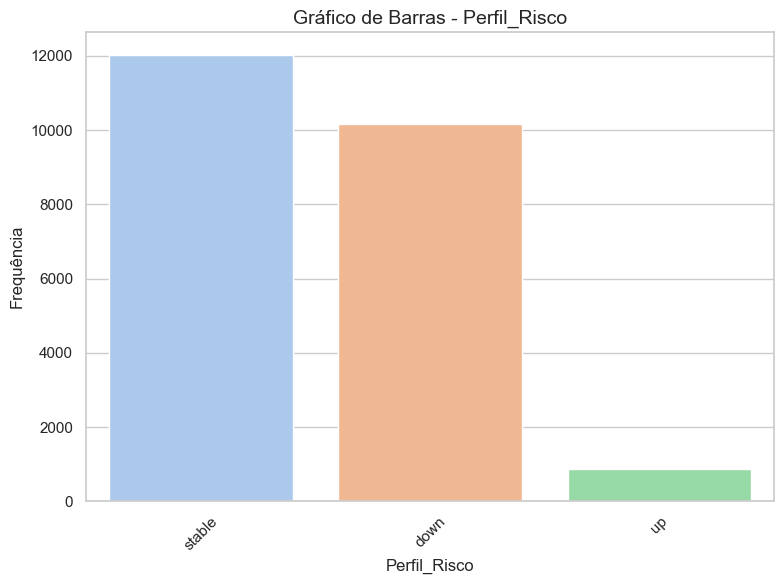

In [70]:
plot_barras(df, 'Perfil_Risco')

Pouco mais de metade dos clientes se manteve no mesmo perfil de risco, mas 44% foi para um nível de risco menor, o que é usual quando a renovação é feita para o mesmo veículo, sem sinistro no ano anterior.

Pelo menos na base disponível, menos de 4% dos clientes tiveram aumento de risco. Precisamos entender se por sinistro no ano anterior ou algum outro fator que seja relacionado com a categorização do risco.

### Perfis entre quem fez o seguro e quem conduz o veículo segurado

In [31]:
tab_freq(df, 'Diferenca_Perfil')

,Diferenca_Perfil,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,same,11155,48.37,11155,48.37
1,only partner,8128,35.25,19283,83.62
2,young drivers,1955,8.48,21238,92.10
3,all drivers > 24,1728,7.49,22966,99.59
4,learner 17,42,0.18,23008,99.77
5,commercial,40,0.17,23048,99.94
6,unknown,12,0.05,23060,99.99


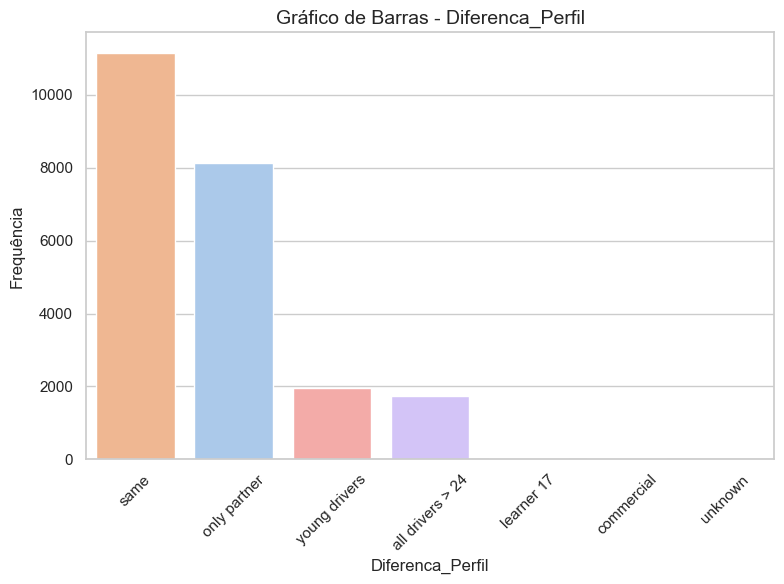

In [71]:
plot_barras(df, 'Diferenca_Perfil')

Aqui cabem algumas ressalvas:
- Pouco mais de 48% dos seguros são direcionados ao próprio segurado, ou seja, apenas ele dirige o veículo.
- Mas temos pouco mais de 35% dos seguros que são feitos para a esposa ou marido do segurado.
- Isso dá quase 84% da nossa base.

Mas temos outras categorias que se misturam, a saber:
- Temos 8,5% de jovens condutores (pelas normas brasileiras, provavelmente entre 18 e 24 anos). Suposição: pais que fazem o seguro para veículos dirigidos pelos filhos.
- 0,18% são aprendizes, ou seja, em teoria, são seguros feitos para quem ainda está na autoescola.
- E temos 7,5% dos seguros onde todos os condutores têm mais de 24 anos, que usualmente é um limite para análise de risco em seguros.
- Temos ainda 0,17% de seguros feitos para uso comercial e 0,05% para uso ou condutores desconhecidos.

Decisão: Para fins didáticos, decidi analisar os dados em cima dos 84% da base, considerando as perguntas do negócio, que é entender os fatores relacionados à não renovação do seguro. Mas essa é uma base que pode ser categorizada melhor na base, pois algumas categorias se sobrepõem.


### Gênero

In [33]:
tab_freq(df, 'Genero')

,Genero,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,Male,14721,63.84,14721,63.84
1,Female,8339,36.16,23060,100.00


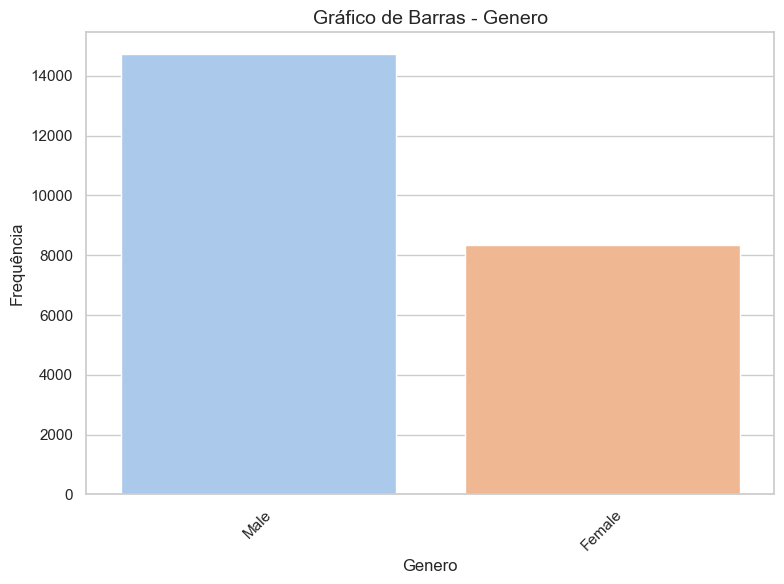

In [72]:
plot_barras(df, 'Genero')

Frequências cosnideráveis para os dois gêneros. Vamos entender se há algo a mais a se entender mais à frente, quando correlacionarmos com as renovações dos seguros e as características dos mesmos.

### Profissão

In [41]:
tab_freq(df, 'Profissao')

,Profissao,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,normal,13578,58.88,13578,58.88
1,medical,9482,41.12,23060,100.00


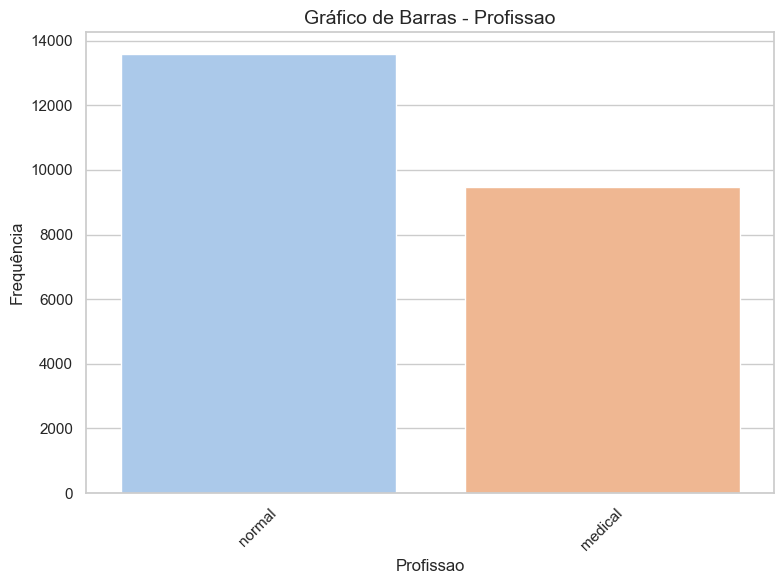

In [73]:
plot_barras(df, 'Profissao')

Aqui a categoria foi divida entre clientes médicos e não médicos.
Temos alguns pressupostos em relação às profissões, mas poderemos confirmar ou refutar no momento de se correlaiconar a profissão com outras variáveis.

### Tempo de Apólice

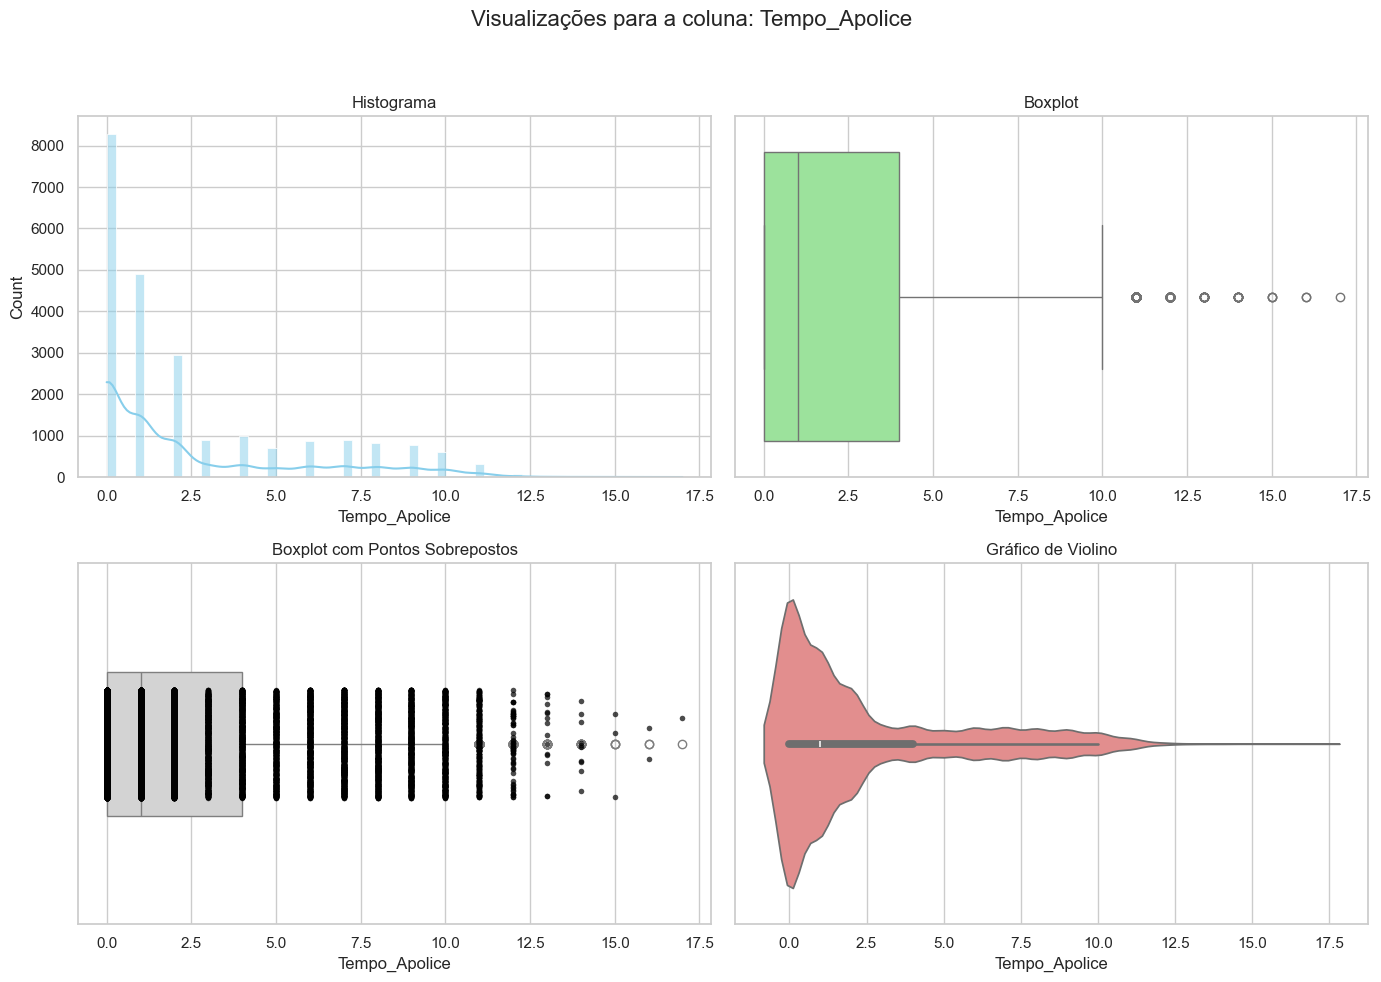

In [44]:
plot_resumos(df, 'Tempo_Apolice')

O histograma de tempo de apólice é bem distribuído à direita, para períodos entre 0 e 2 anos, aproximadamente. 
O boxplot nos mostra que cerca de 75% da nossa base tem seguros entre 0 e 4 anos.

#### Segmentação dos tempos de apólice

In [ ]:
# 0 a 4 anos
# 5 a 10 anos
# acima de 10 anos

condicoes = [
    (df['Tempo_Apolice'] >= 0) & (df['Tempo_Apolice'] <= 4),
    (df['Tempo_Apolice'] > 4) & (df['Tempo_Apolice'] <= 10),
    (df['Tempo_Apolice'] > 10)
]

# Rótulos
faixas = ['0 a 4 anos', '5 a 10 anos', 'acima de 10 anos']

# Classificação
tempo_apol = np.select(condicoes, faixas, default='sem_valor')


In [57]:
# Lançando a segmentação no Dataframe
df['Segmento_Tempo_Apolice'] = tempo_apol

In [61]:
tab_freq(df, 'Segmento_Tempo_Apolice')

,Segmento_Tempo_Apolice,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,0 a 4 anos,18021,78.15,18021,78.15
1,5 a 10 anos,4640,20.12,22661,98.27
2,acima de 10 anos,399,1.73,23060,100.00


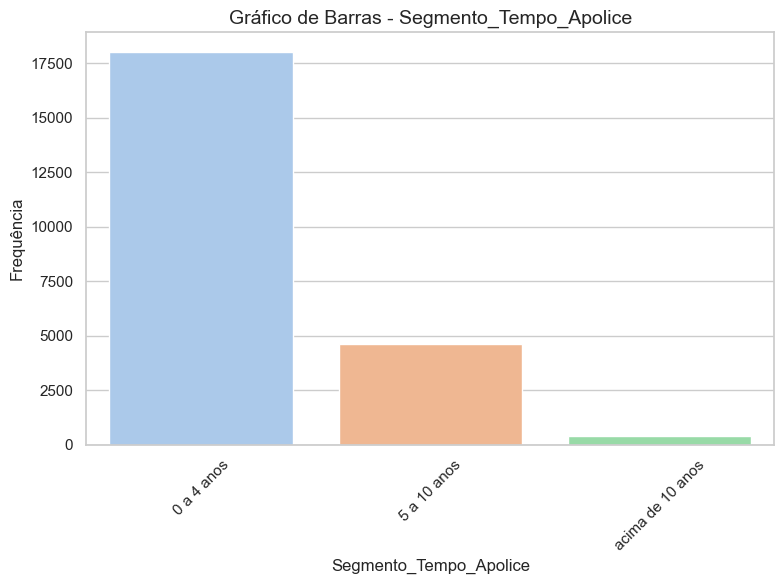

In [74]:
plot_barras(df, 'Segmento_Tempo_Apolice')

A segmentação por tempo da apólice será útil mais tarde no modelo de regressão logística, onde poderemos usá-los como variáveis Dummy.

### Uso do Veículo

In [75]:
tab_freq(df, 'Uso_Veiculo')

,Uso_Veiculo,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,private or freelance work,19567,84.85,19567,84.85
1,unknown,3483,15.10,23050,99.95
2,commercial,10,0.04,23060,99.99


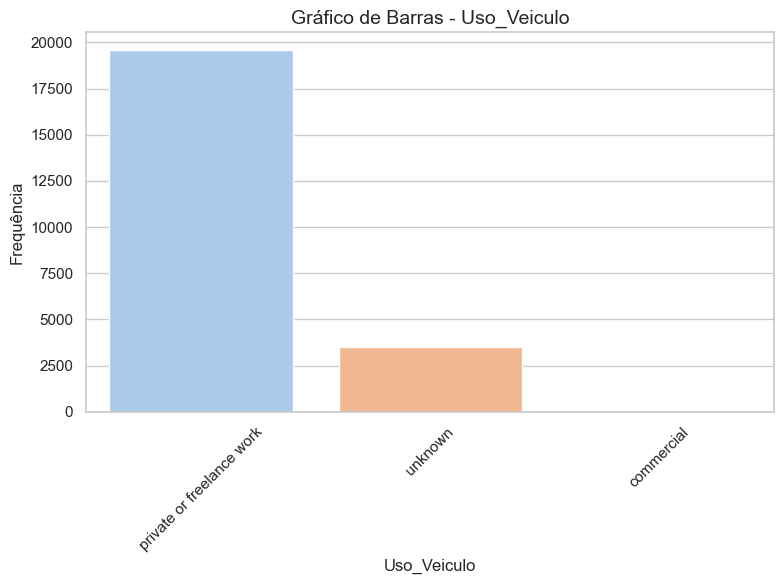

In [76]:
plot_barras(df, 'Uso_Veiculo')

Quase 85% do uso é pessoal ou para uso esporádico profissional.

### Quantidade de Apólices

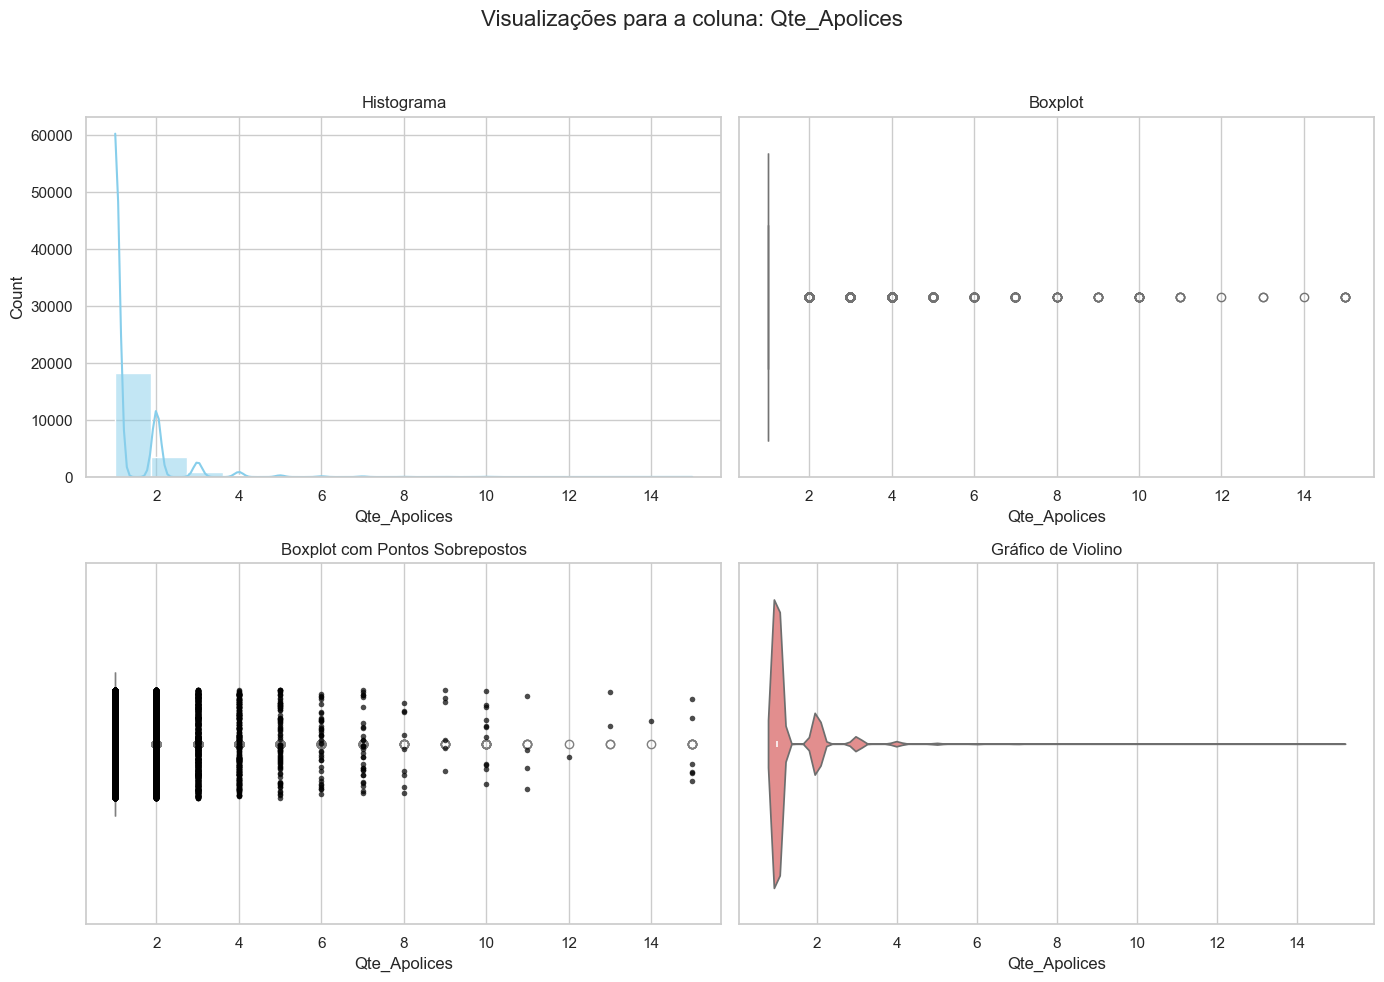

In [78]:
plot_resumos(df, 'Qte_Apolices')

In [79]:
tab_freq(df, 'Qte_Apolices')

,Qte_Apolices,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,1,18259,79.18,18259,79.18
1,2,3541,15.36,21800,94.54
2,3,793,3.44,22593,97.98
3,4,270,1.17,22863,99.15
4,5,87,0.38,22950,99.53
5,6,39,0.17,22989,99.70
6,7,31,0.13,23020,99.83
7,10,11,0.05,23031,99.88
8,8,9,0.04,23040,99.92
9,15,6,0.03,23046,99.95


Cerca de 80% dos clientes possuem apenas uma apólice. Vamos segmentar os clientes para poder utilizar melhor essa variável mais à frente, no modelo de regressão.

#### Segmentando os números de apólices

In [88]:
# Segmentando os dados de número de apólices
# 1 apólice
# 2 apólices
# mais de 2 apólices

condicoes_apol = [
    (df['Qte_Apolices'] == 1),
    (df['Qte_Apolices'] == 2) ,
    (df['Qte_Apolices'] > 2)
]

# Rótulos
faixas_apol = ['1 apólice', '2 apólices', 'mais de 2 apólices']

# Classificação
num_apol = np.select(condicoes_apol, faixas_apol, default='sem_valor')

In [89]:
df['Numero_Apolices'] = num_apol

In [90]:
tab_freq(df, 'Numero_Apolices')

,Numero_Apolices,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,1 apólice,18259,79.18,18259,79.18
1,2 apólices,3541,15.36,21800,94.54
2,mais de 2 apólices,1260,5.46,23060,100.00


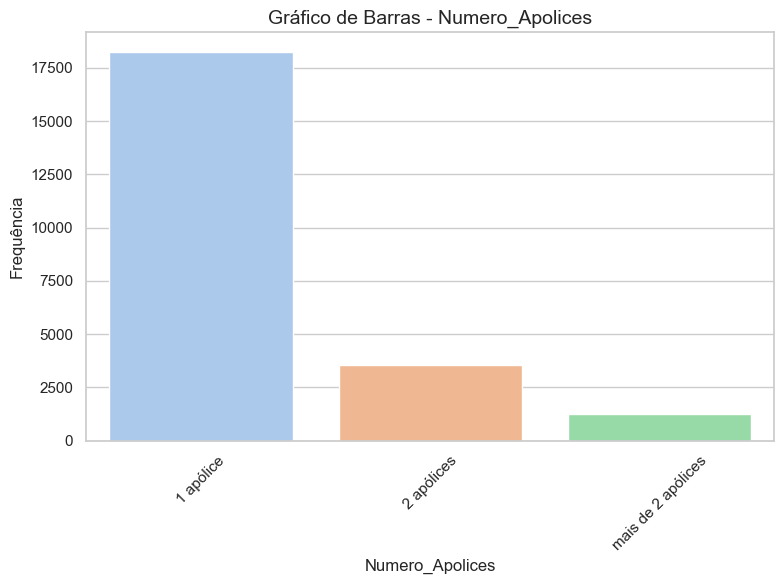

In [91]:
plot_barras(df, 'Numero_Apolices')

### Prêmio pago pelo cliente

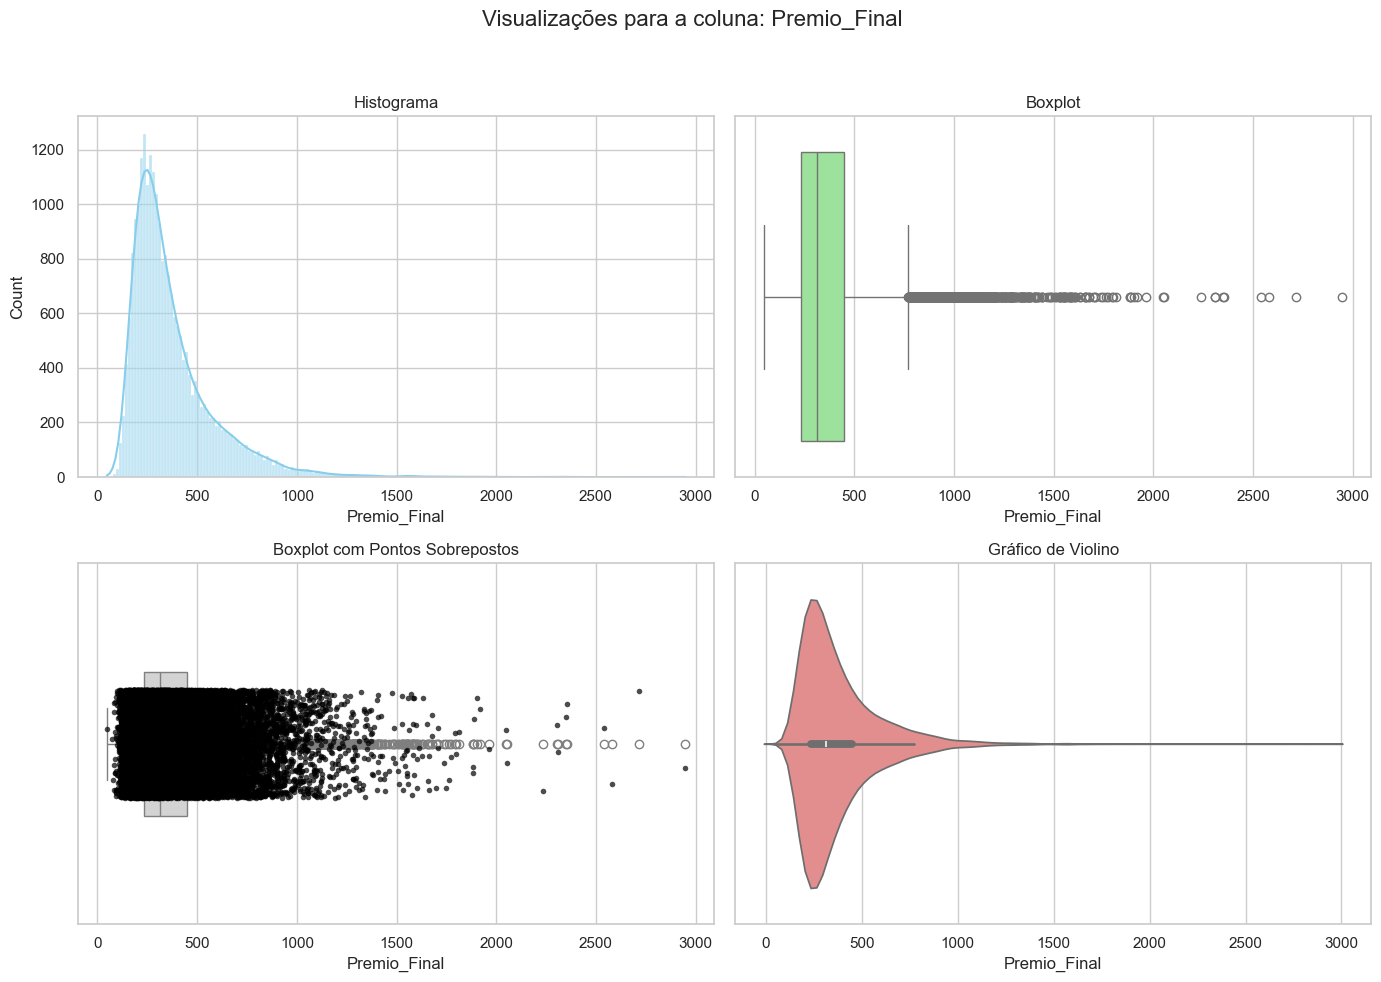

In [94]:
plot_resumos(df, 'Premio_Final')

Histograma bastante distribuído à direita onde é possivel visualizar que os clientes pagam de 250 a 500 reais de prêmio pelo seguro (boxplot).
Temos muitos prêmios acima de 750 reais, que representam outliers.

É preciso verificar se serão rsponsáveis por alguma discrepância na modelagem do algoritmo.

In [95]:
df['Premio_Final'].describe()

count    23060.000000
mean       374.123791
std        212.899174
min         46.550000
25%        232.837500
50%        312.250000
75%        448.370000
max       2948.050000
Name: Premio_Final, dtype: float64

In [97]:
# Calcula os quartis e o IQR
q1 = df['Premio_Final'].quantile(0.25)
q3 = df['Premio_Final'].quantile(0.75)
iqr = q3 - q1

# Define os limites inferior e superior
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Identifica os outliers
outliers = df['Premio_Final'][(df['Premio_Final'] < limite_inferior) | (df['Premio_Final'] > limite_superior)]
print(f'Número de outliers: {len(outliers)}, que representam {len(outliers) / len(df) * 100:.2f}% do total de dados.')

Número de outliers: 1281, que representam 5.56% do total de dados.


Os outliers representam cerca de 5,5% de toda a base de prêmios pagos.
Por enquanto, vamos desconsiderá-los na análise.

In [98]:
# Média e mediana dos prêmios
media = df['Premio_Final'].mean()
mediana = df['Premio_Final'].median()
print(f'Média: {media:.2f}')
print(f'Mediana: {mediana:.2f}')

Média: 374.12
Mediana: 312.25


In [102]:
sem_outliers = df['Premio_Final'][(df['Premio_Final'] >= limite_inferior) & (df['Premio_Final'] <= limite_superior)]
com_outliers = df['Premio_Final']

In [103]:
plot_compara_premios = pd.DataFrame({
    'valor': pd.concat([com_outliers, sem_outliers], ignore_index=True),
    'tipo': ['com outliers'] * len(com_outliers) + ['sem outliers'] * len(sem_outliers)
})

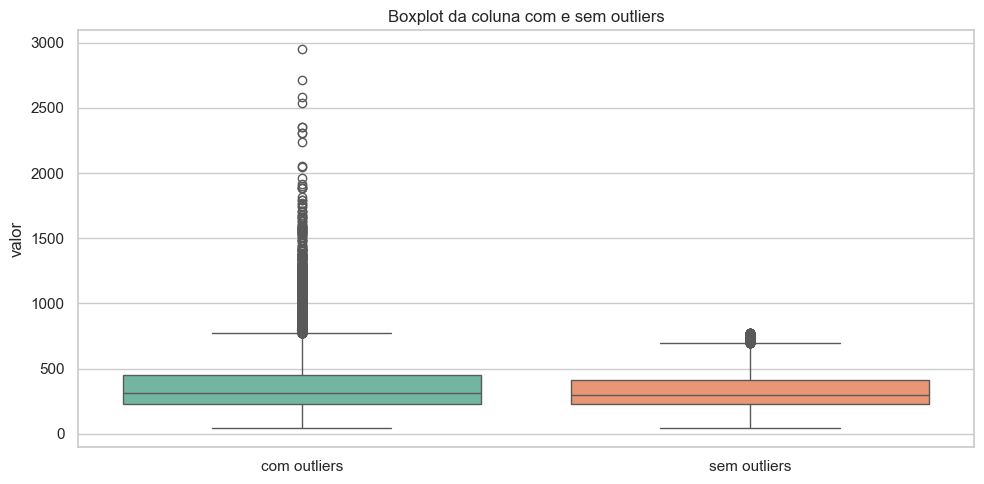

In [108]:
# Gráfico lado a lado 
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=plot_compara_premios,
    x='tipo',
    y='valor',
    hue='tipo',             
    palette='Set2',
    dodge=False             # Mantém cada grupo em uma posição
)
plt.title(f'Boxplot da coluna com e sem outliers')
plt.xlabel('')
plt.tight_layout()
plt.show()

Mesmo removendo os outliers, a variação das médias e medianas é irrelevante para uma futura construção do modelo.
Mas, podemos verificar o impacto desses outliers no modelo posteriormente.

### Parcelamento do Prêmio

In [7]:
tab_freq(df, 'Premio_Qte_Parc')

,Premio_Qte_Parc,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,1 per year,11680,50.65,11680,50.65
1,4 per year,6114,26.51,17794,77.16
2,2 per year,3090,13.40,20884,90.56
3,12 per year,2176,9.44,23060,100.00


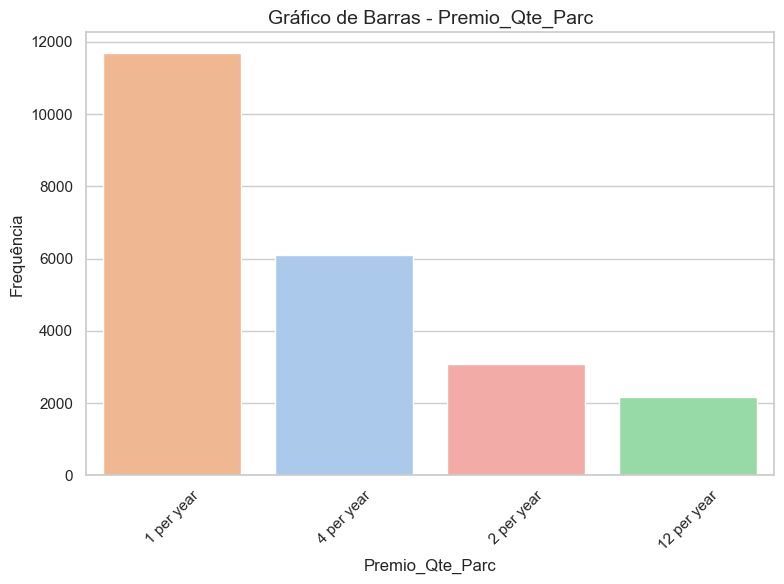

In [8]:
plot_barras(df, 'Premio_Qte_Parc')

Metade dos clientes paga o seguro à vista. Existem ainda parcelamentos em 2, 4 e 12 vezes.
Veremos mais à frente a correlação entre o número de parcelas e a variável resposta.

### Valos do último seguro pago

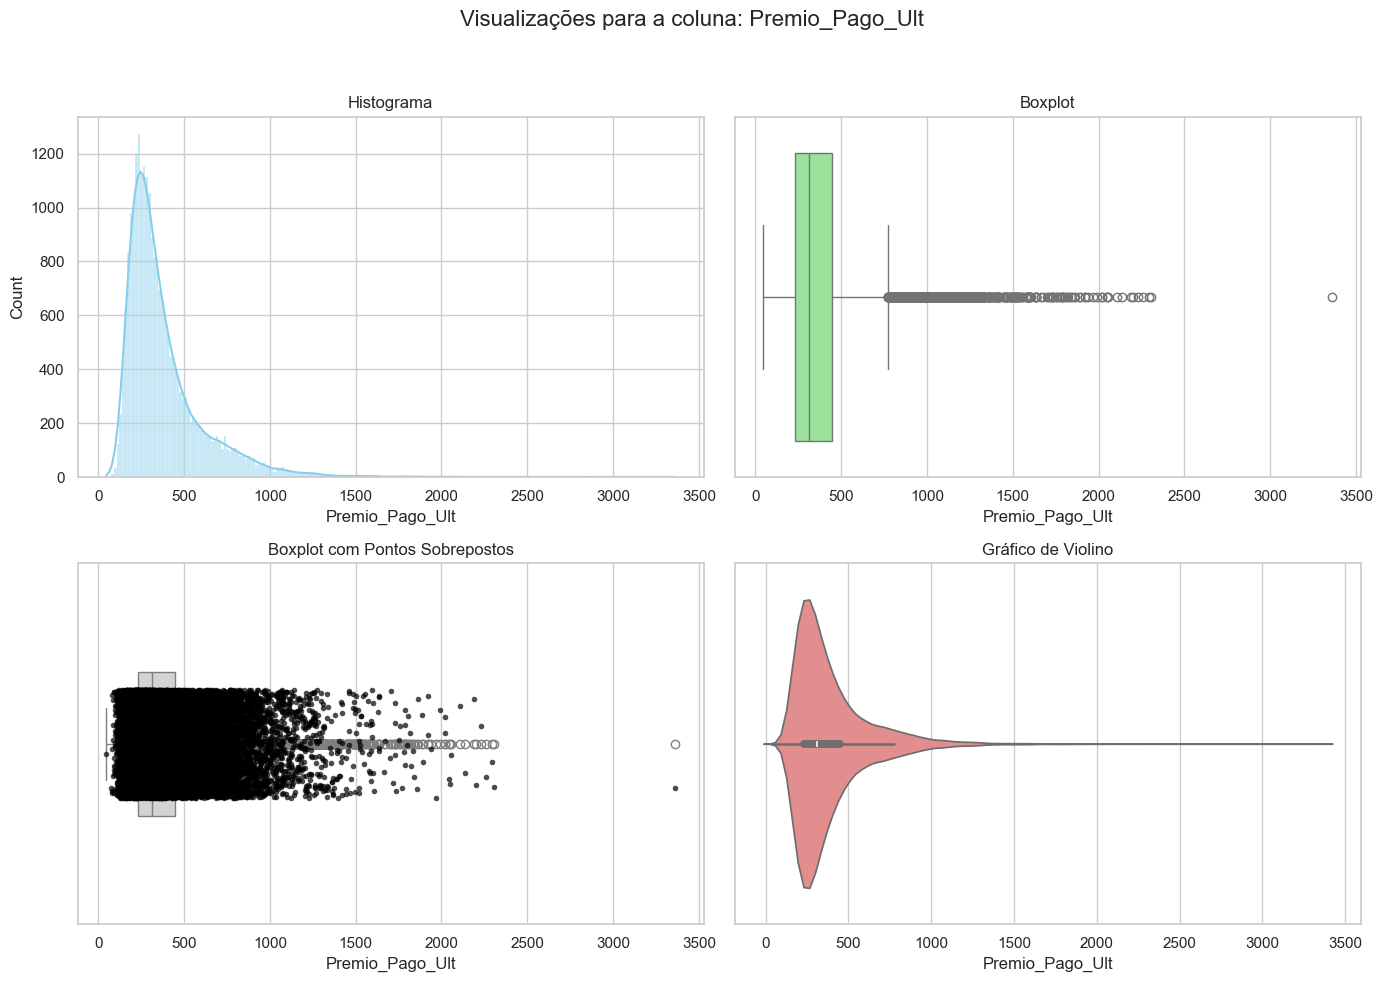

In [10]:
plot_resumos(df, 'Premio_Pago_Ult')

Dados bem parecidos com o prêmio final pago. Provavelmente essas duas variáveis são altamente correlacionadas (veremos mais à frente), o que pode denotar multicolinearidade caso utilizemos as duas na construção do algoritmo.

### Valos da concorrência

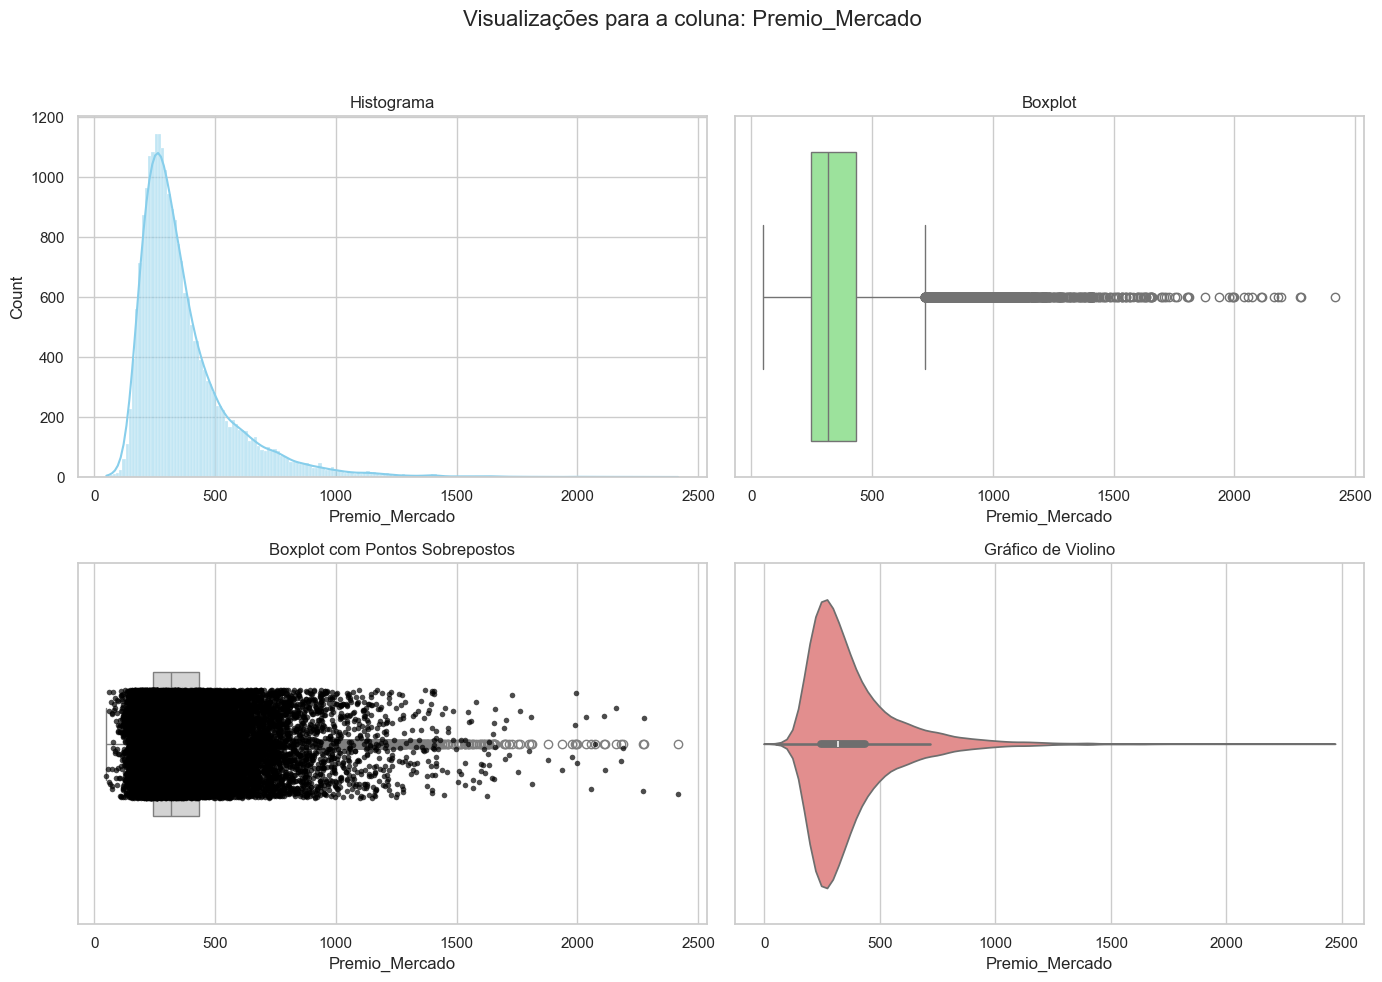

In [11]:
plot_resumos(df, 'Premio_Mercado')

Visualmente, os gráficos não denotam uma diferença muito grande entre os prêmios da seguradora e os prêmios da concorrência, o que nos parece OK, considerando que essas empresas utilizam, muitas vezes, as mesmas metodologisas de cálculo de risco. 

Como é um dado incerto, coletado da concorrência, a amostra pode ter distorções, o que pod ser visto pelo grande número de outliers.

### Prêmio calculado pelos etor de pricing da empresa

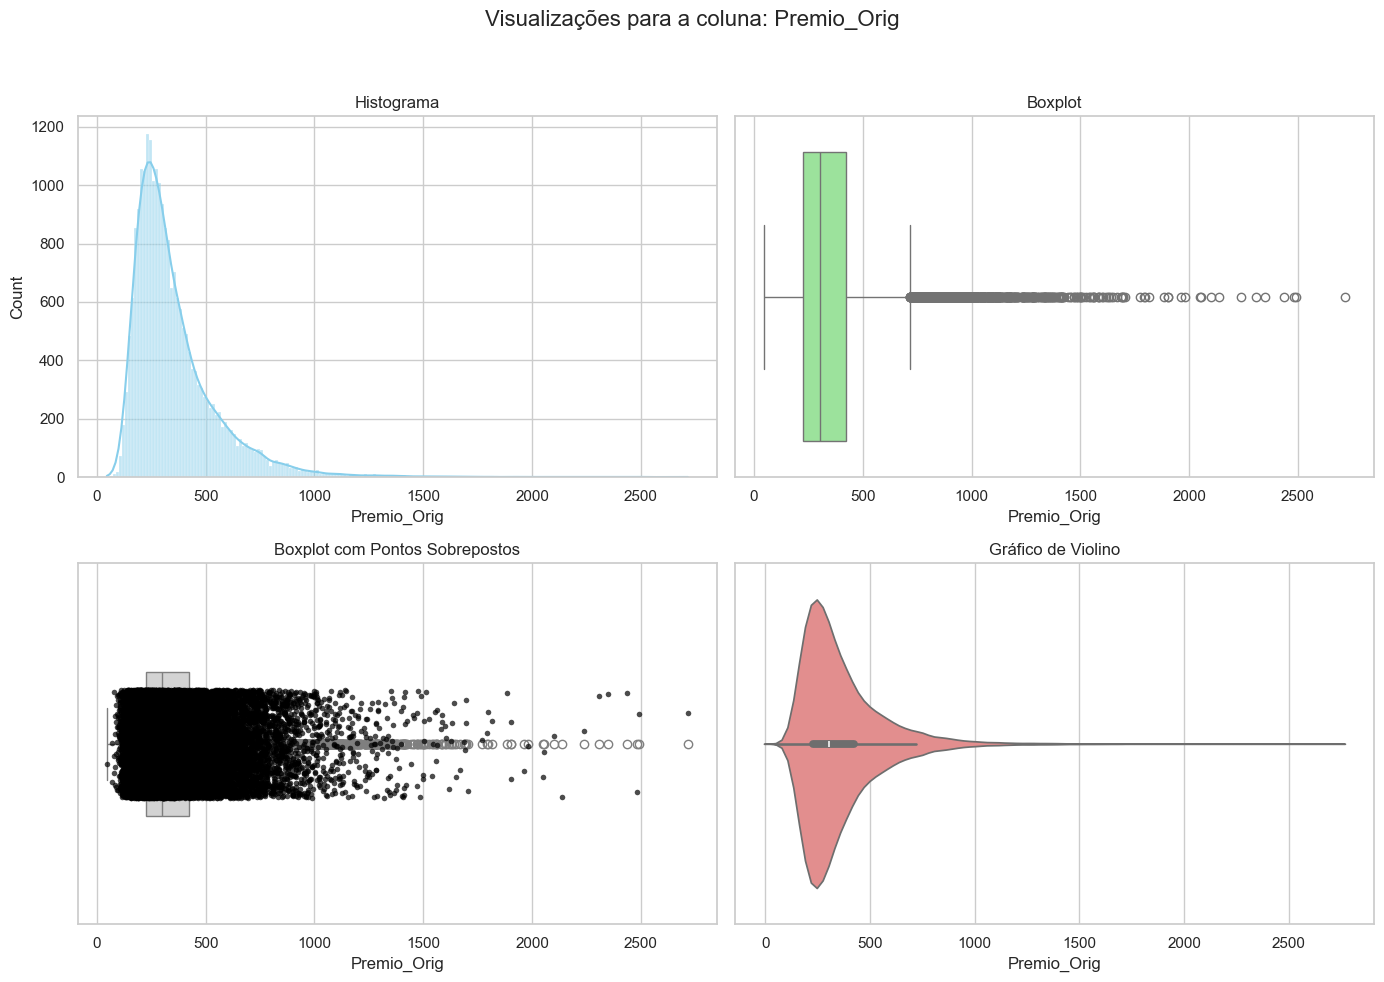

In [12]:
plot_resumos(df,'Premio_Orig')

Da mesma forma, a previsão feita pelos etor de pricing, visualmente é bem parecido com os prêmios efetivamente pagos e também pelas estimativas da concorrência. A distribuição dos dados é bem parecida.

### Idade do veículo

In [19]:
sorted(df['Veic_Idade'].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18)]

A idades dos veículos vão de 0 a 18 anos.
Podemos fazer uma segmentação inicial com carro novo (até 1 ano), seminovos (1 a 3 anos) e usados (acima de 3 anos).
Se essa segmentação não identificar nada, podemos re-segmentar de outras maneiras mais à frente.

In [31]:
# Carro novo - 0 a 1 ano
# Carro seminovo - 1 a 3 anos
# Carro usado - acima de 3 anos

condicoes_idade = [
    (df['Veic_Idade'] <= 1),
    (df['Veic_Idade'] > 1) & (df['Veic_Idade'] <= 3),
    (df['Veic_Idade'] > 3)
]

# Rótulos
faixas_idade = ['Veículo novo - 0 a 1 ano', 'Veículo seminovo - 1 a 3 anos', 'Veículo usado - acima de 3 anos']

# Classificação
idade_veic = np.select(condicoes_idade, faixas_idade, default='sem_informação_idade')

In [32]:
df['Idade_Veiculo'] = idade_veic

In [33]:
tab_freq(df, 'Idade_Veiculo')

,Idade_Veiculo,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,Veículo usado - acima de 3 anos,22747,98.64,22747,98.64
1,Veículo seminovo - 1 a 3 anos,185,0.80,22932,99.44
2,Veículo novo - 0 a 1 ano,128,0.56,23060,100.00


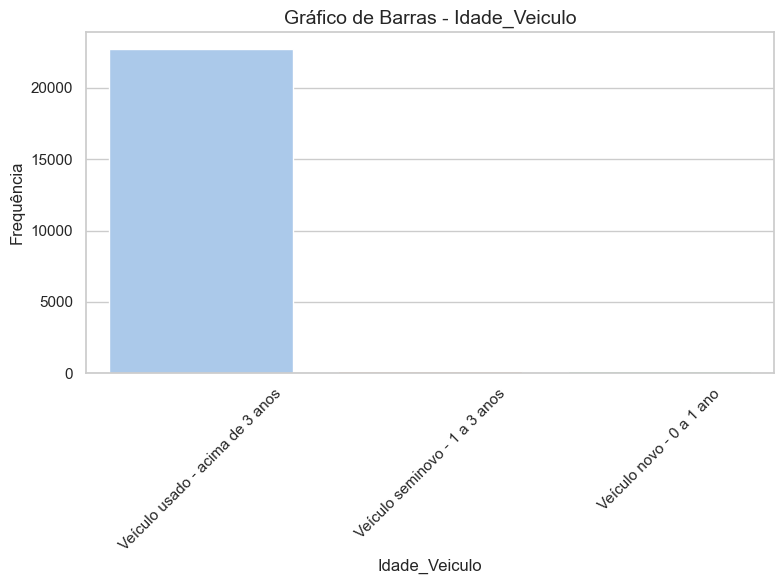

In [34]:
plot_barras(df, 'Idade_Veiculo')

A maior parte dos veículos segurados tem maids de 3 anos, o que pode denotar um aumento no prêmio pago na renovação do seguro.

### Idade do veículo na compra

In [36]:
sorted(df['Veic_Idade_Compra'].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18)]

Podemos fazer a mesma segmentação para a variável anterior -  idade do veículo. Pode ser que ambas as variávei sejam muito correlacionadas.

In [45]:
# Segmentação da idade do veículo no momento da compra

condicoes_idade_compra = [
    (df['Veic_Idade_Compra'] <= 1),
    (df['Veic_Idade_Compra'] > 1) & (df['Veic_Idade_Compra'] <= 3),
    (df['Veic_Idade_Compra'] > 3)
]

# Rótulos
faixas_idade_compra = ['0 a 1 ano na compra', '1 a 3 anos na compra', 'acima de 3 anos na compra']

# Classificação
idade_veic_compra = np.select(condicoes_idade_compra, faixas_idade_compra, default='sem_informação_idade')

In [46]:
df['Idade_Veiculo_Compra'] = idade_veic_compra

In [47]:
tab_freq(df, 'Idade_Veiculo_Compra')

,Idade_Veiculo_Compra,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,acima de 3 anos na compra,17454,75.69,17454,75.69
1,0 a 1 ano na compra,3594,15.59,21048,91.28
2,1 a 3 anos na compra,2012,8.73,23060,100.01


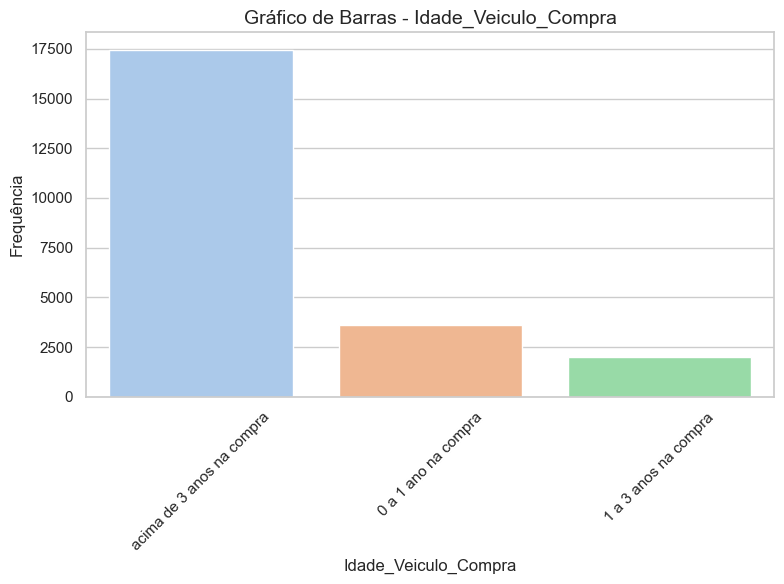

In [48]:
plot_barras(df, 'Idade_Veiculo_Compra')

### Tipo de garagem no pernoite

In [49]:
df['Veic_Garagem'].unique()

array(['private garage', 'underground garage', 'street', 'other',
       'carport', 'parking deck', 'unknown', 'private estate'],
      dtype=object)

Temos aqui algumas categorias de garagem que se sobrepõem.
À primeira vista, poderíamos unificar 'other' e 'unknown'.
Para fins de cálculo de seguro, podemos inferir se o veículo pernoita em garagem (seja privada ou alugada) ou na rua.

Faremos essa segmentação num primeiro momento.
No momento da construção do modelo, veremos que será necessário readequar essa segmentação.

In [50]:
tab_freq(df, 'Veic_Garagem')

,Veic_Garagem,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,private garage,8863,38.43,8863,38.43
1,street,5468,23.71,14331,62.14
2,other,2243,9.73,16574,71.87
3,parking deck,2243,9.73,18817,81.60
4,unknown,1575,6.83,20392,88.43
5,carport,1413,6.13,21805,94.56
6,underground garage,1056,4.58,22861,99.14
7,private estate,199,0.86,23060,100.00


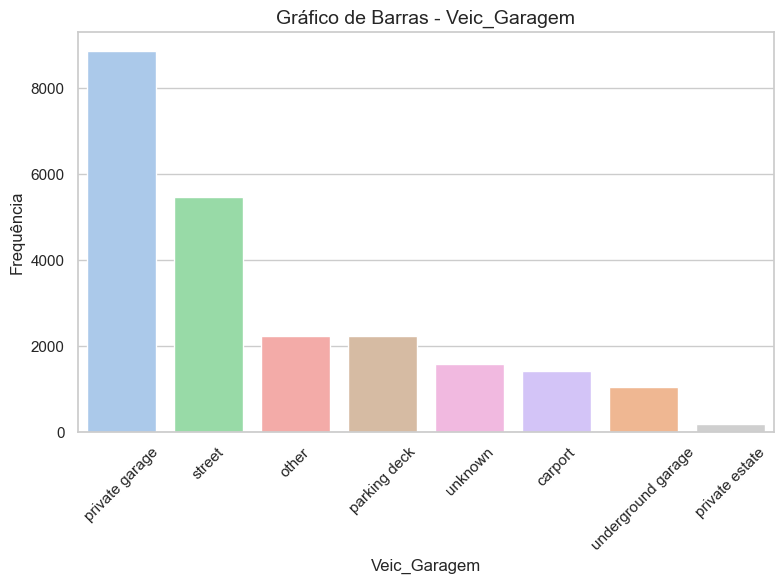

In [51]:
plot_barras(df, 'Veic_Garagem')

In [57]:
# Segmentando os dados

mapeamento = {
    'other': 'outro',
    'unknown': 'outro',
    'street': 'rua',
    'private garage': 'garagem fechada',
    'underground garage': 'garagem fechada',
    'carport': 'garagem fechada',
    'parking deck': 'garagem fechada',
    'private estate': 'garagem fechada'
}

df['Tipo_Garagem'] = df['Veic_Garagem'].map(mapeamento)

In [59]:
tab_freq(df, 'Tipo_Garagem')

,Tipo_Garagem,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,garagem fechada,13774,59.73,13774,59.73
1,rua,5468,23.71,19242,83.44
2,outro,3818,16.56,23060,100.00


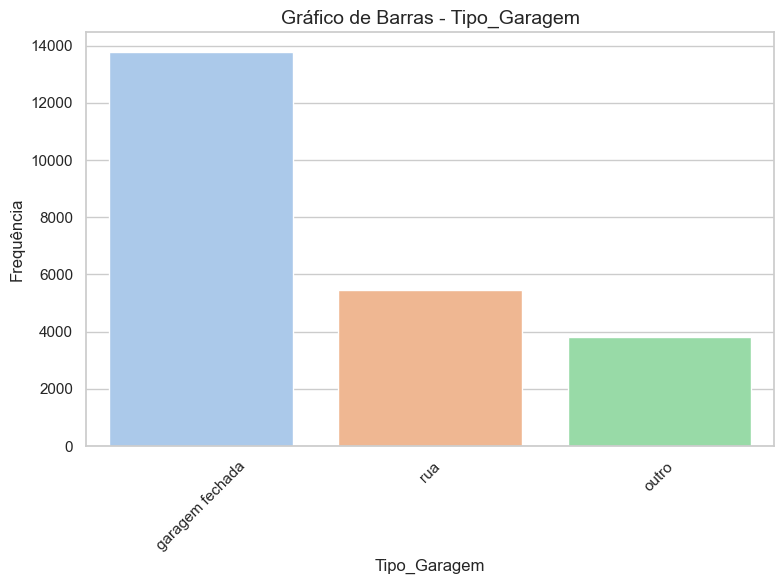

In [60]:
plot_barras(df, 'Tipo_Garagem')	

Quase 60% dos segurados guardam o veículo em garagens privadas.
Contudo, quase 25% deixa o veículo pernoitar na rua, o que aumento o risco de roubos ou acidentes.

### Potência do veículo

In [70]:
(df['Veic_Potencia'].unique())

array(['225 kW', '100 kW', '75 kW', '25-50 kW', '125-300 kW', '150 kW',
       '175 kW', '200 kW', '250 kW', '300 kW', '275 kW'], dtype=object)

In [69]:
df['Veic_Potencia'].value_counts()

Veic_Potencia
75 kW         10339
100 kW         5116
25-50 kW       4968
125-300 kW     1720
150 kW          580
175 kW          206
225 kW           77
200 kW           32
250 kW           16
275 kW            4
300 kW            2
Name: count, dtype: int64

A coluna é toda em formato string. E temos uma categoria indicando um intervalo de valor (25-50 e 125-300).
São 11 categorias.

Vou seguir a estratégia de reduzir as categorias.

In [73]:
# 25 a 50 Kw
# 75 kW
# 100 kW
# acima de 100 kW

map_potencia = {
    '25-50 kW': '25 a 50 kW',
    '75 kW': '75 kW',
    '100 kW': '100 kW',
    '225 kW': 'acima de 100 kW',
    '125-300 kW': 'acima de 100 kW',
    '150 kW': 'acima de 100 kW',
    '175 kW': 'acima de 100 kW',
    '200 kW': 'acima de 100 kW',
    '250 kW': 'acima de 100 kW',
    '300 kW': 'acima de 100 kW',
    '275 kW': 'acima de 100 kW'}

df['Potencia'] = df['Veic_Potencia'].map(map_potencia)

In [76]:
tab_freq(df, 'Potencia')

,Potencia,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,75 kW,10339,44.84,10339,44.84
1,100 kW,5116,22.19,15455,67.03
2,25 a 50 kW,4968,21.54,20423,88.57
3,acima de 100 kW,2637,11.44,23060,100.01


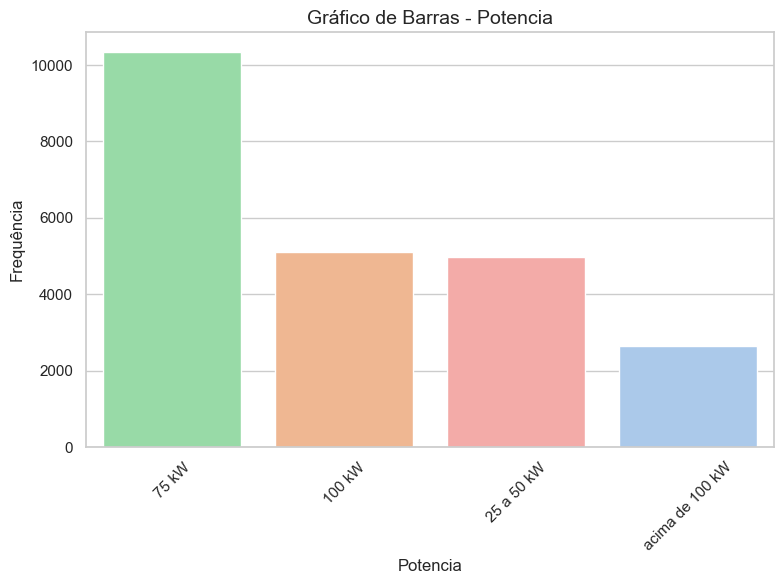

In [77]:
plot_barras(df, 'Potencia')

### Região de moradia do cliente

In [78]:
df['Veic_Regiao'].unique()

array(['Reg7', 'Reg4', 'Reg5', 'Reg14', 'Reg8', 'Reg6', 'Reg10', 'Reg13',
       'Reg3', 'Reg12', 'Reg11', 'Reg1', 'Reg2', 'Reg9'], dtype=object)

Não temos informações sobre as regiões de moradia dos clientes ou dados como índice de roubos e acidentes.
Mas a distribuição dos segurados entre regiões pode nos mostrar algum dado, no momento em que formos correlacionar com as flags de renovação de seguro.

Nesse primeiro momento, vamos apenas entender a distribuição dos segurados em suas respectivas regiões.

In [79]:
tab_freq(df, 'Veic_Regiao')

,Veic_Regiao,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,Reg4,4325,18.76,4325,18.76
1,Reg7,3156,13.69,7481,32.45
2,Reg8,3074,13.33,10555,45.78
3,Reg5,2391,10.37,12946,56.15
4,Reg3,1827,7.92,14773,64.07
5,Reg12,1325,5.75,16098,69.82
6,Reg14,1289,5.59,17387,75.41
7,Reg9,1169,5.07,18556,80.48
8,Reg6,1119,4.85,19675,85.33
9,Reg10,1057,4.58,20732,89.91


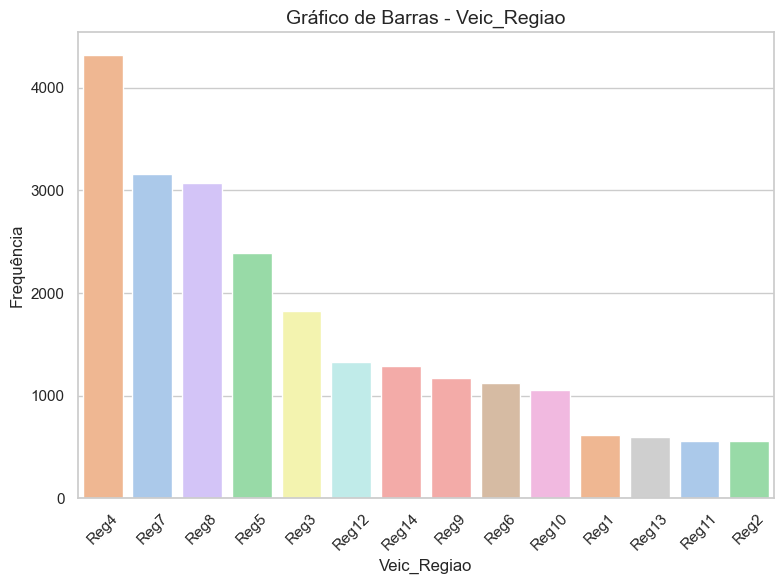

In [80]:
plot_barras(df, 'Veic_Regiao')

Não há regiões onde a distribuição seja muito mais alta que as demais.